# Importing Library

In [58]:
pip install xgboost lightgbm

In [112]:
pip show xgboost

Name: xgboost
Version: 2.1.0
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 


In [59]:
pip install python-whois

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import whois
import requests
import numpy as np
import ssl
import socket
from scipy.stats import pearsonr
from wordcloud import WordCloud
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from datetime import date, datetime
from functools import lru_cache
from concurrent.futures import ThreadPoolExecutor

#Loading Dataset

In [61]:
data = pd.read_csv('/content/drive/MyDrive/Phishing Detection/Dataset/Extracted Dataset/Preprocessed Dataset.csv')

In [62]:
data.head()

,url,have_ip_address,url_length,shortening_service,count@,count_http,count_https,countdot,count-,count_,...,counttilde,countplus,countasterisk,counthashtag,countdollar,emailexist,domain_age,regis_length,SSL_certificate,type
0,music.yahoo.com/roy-c-hammond/,0,30,0,0,0,0,2,2,0,...,0,0,0,0,0,0,10650.0,10950.0,1,benign
1,islanders.nhl.com/club/player.htm?id=8474690,0,44,0,0,0,0,3,0,0,...,0,0,0,0,0,0,10740.0,10950.0,1,benign
2,http://jalopnik.com/the-hermit-kingdom-an-insi...,0,85,0,0,1,0,1,10,0,...,0,0,0,0,0,0,7140.0,7290.0,1,benign
3,http://mic.com/articles/115266/it-s-official-h...,0,85,0,0,1,0,1,8,0,...,0,0,0,0,0,0,11130.0,13500.0,1,benign
4,music.yahoo.com/ajda-pekkan/albums/cool-kadin-...,0,59,0,0,0,0,2,5,0,...,0,0,0,0,0,0,10650.0,10950.0,1,benign


Dropping url column

In [63]:
data.drop(columns=['url'],inplace=True)

#Data Visualization

Dimension of data

In [64]:
data.shape

(55730, 27)

Value count of each label

In [65]:
data['type'].value_counts()

,count
type,
benign,27865
phishing,27865


Data type and other information

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55730 entries, 0 to 55729
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   have_ip_address     55730 non-null  int64  
 1   url_length          55730 non-null  int64  
 2   shortening_service  55730 non-null  int64  
 3   count@              55730 non-null  int64  
 4   count_http          55730 non-null  int64  
 5   count_https         55730 non-null  int64  
 6   countdot            55730 non-null  int64  
 7   count-              55730 non-null  int64  
 8   count_              55730 non-null  int64  
 9   count?              55730 non-null  int64  
 10  count_path          55730 non-null  int64  
 11  count=              55730 non-null  int64  
 12  count&              55730 non-null  int64  
 13  count!              55730 non-null  int64  
 14  count%              55730 non-null  int64  
 15  countspace          55730 non-null  int64  
 16  coun

In [67]:
data.describe()

,have_ip_address,url_length,shortening_service,count@,count_http,count_https,countdot,count-,count_,count?,...,countcomma,counttilde,countplus,countasterisk,counthashtag,countdollar,emailexist,domain_age,regis_length,SSL_certificate
count,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,...,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000,55730.000000
mean,0.000467,53.093486,0.004540,0.004755,0.244787,0.074933,2.112884,1.153329,0.363682,0.157545,...,0.003230,0.025211,0.048466,0.001256,0.001812,0.000610,0.002907,7459.946528,8023.886776,0.814283
std,0.021595,46.566612,0.067225,0.071354,0.491574,0.270413,1.216213,2.602672,1.158281,0.403753,...,0.121702,0.158247,0.526805,0.229760,0.044593,0.041065,0.053837,3236.230662,3440.536799,0.388881
min,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,29.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5520.000000,5820.000000,1.000000
50%,0.000000,40.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8415.000000,8760.000000,1.000000
75%,0.000000,61.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9840.000000,10590.000000,1.000000
max,1.000000,1779.000000,1.000000,4.000000,9.000000,5.000000,24.000000,87.000000,28.000000,13.000000,...,15.000000,3.000000,37.000000,54.000000,3.000000,6.000000,1.000000,14310.000000,36510.000000,1.000000


Label Encoding

In [68]:
encoder = LabelEncoder()
data['type'] = encoder.fit_transform(data['type'])

In [69]:
data.head()

,have_ip_address,url_length,shortening_service,count@,count_http,count_https,countdot,count-,count_,count?,...,counttilde,countplus,countasterisk,counthashtag,countdollar,emailexist,domain_age,regis_length,SSL_certificate,type
0,0,30,0,0,0,0,2,2,0,0,...,0,0,0,0,0,0,10650.0,10950.0,1,0
1,0,44,0,0,0,0,3,0,0,1,...,0,0,0,0,0,0,10740.0,10950.0,1,0
2,0,85,0,0,1,0,1,10,0,0,...,0,0,0,0,0,0,7140.0,7290.0,1,0
3,0,85,0,0,1,0,1,8,0,0,...,0,0,0,0,0,0,11130.0,13500.0,1,0
4,0,59,0,0,0,0,2,5,0,0,...,0,0,0,0,0,0,10650.0,10950.0,1,0


Age of domain distribution

<Axes: xlabel='domain_age', ylabel='Count'>

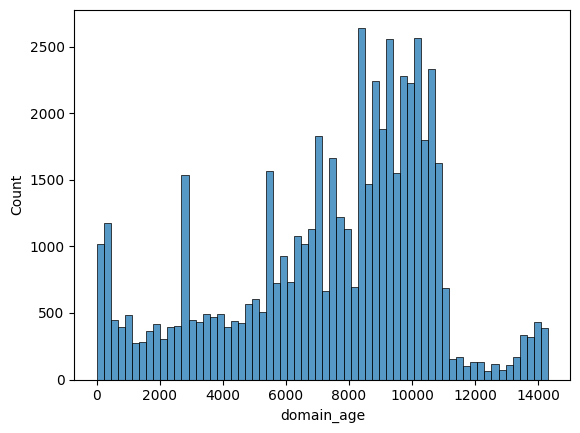

In [70]:
sns.histplot(data=data['domain_age'])

<Axes: ylabel='domain_age'>

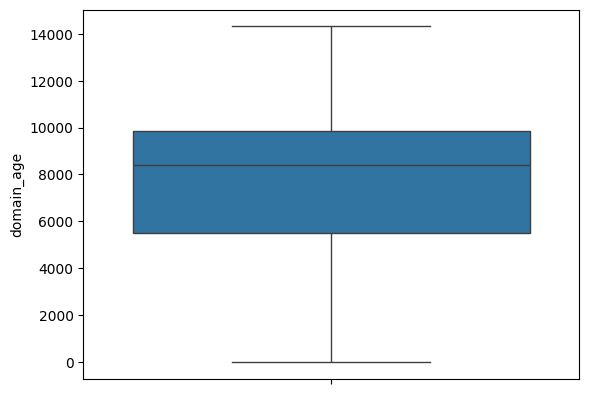

In [71]:
sns.boxplot(data=data['domain_age'])

Registration length of domain distribution

<Axes: xlabel='regis_length', ylabel='Count'>

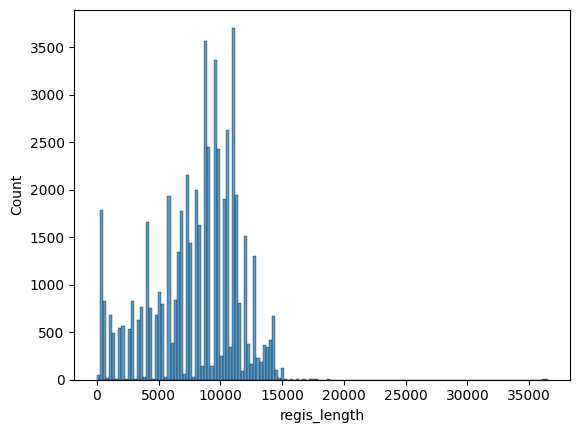

In [72]:
sns.histplot(data=data['regis_length'])

Boxplot of registration_length

<Axes: ylabel='regis_length'>

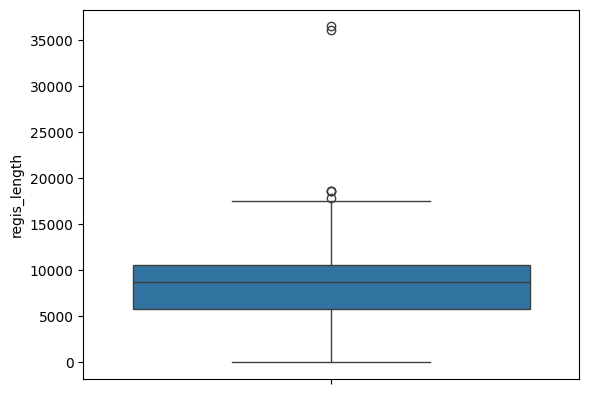

In [73]:
sns.boxplot(data=data['regis_length'])

<Axes: xlabel='type', ylabel='SSL_certificate'>

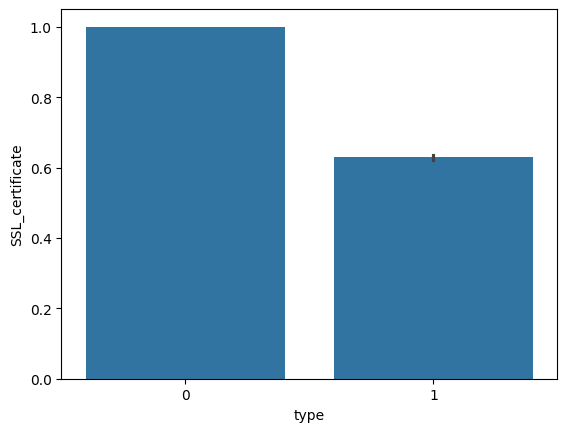

In [74]:
sns.barplot(data=data, x = 'type', y = 'SSL_certificate')

<Axes: xlabel='type', ylabel='count_http'>

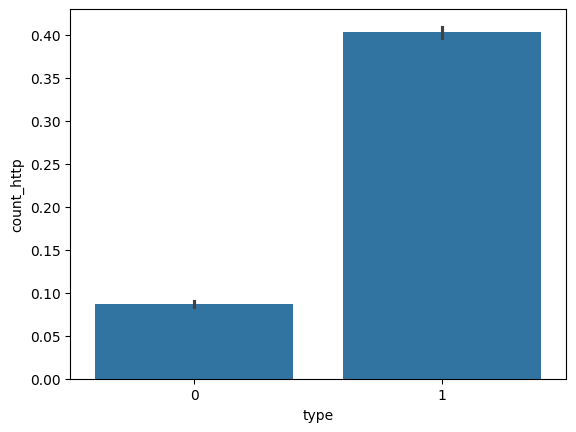

In [75]:
sns.barplot(data=data, x = 'type', y = 'count_http')

<Axes: xlabel='type', ylabel='count_https'>

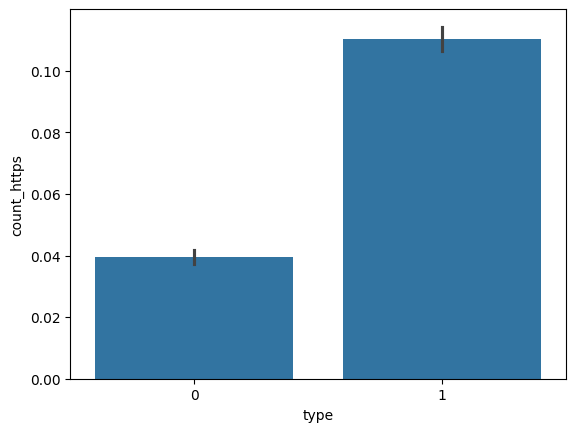

In [76]:
sns.barplot(data=data, x = 'type', y = 'count_https')

<Axes: xlabel='type', ylabel='countdot'>

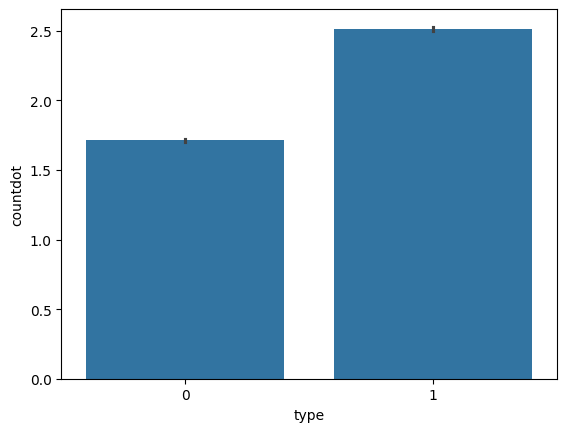

In [77]:
sns.barplot(data=data, x = 'type', y = 'countdot')

<Axes: xlabel='type', ylabel='counttilde'>

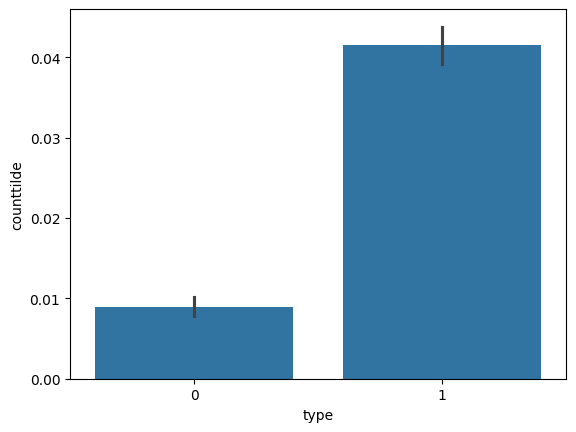

In [78]:
sns.barplot(data=data, x = 'type', y = 'counttilde')

<Axes: xlabel='type', ylabel='count-'>

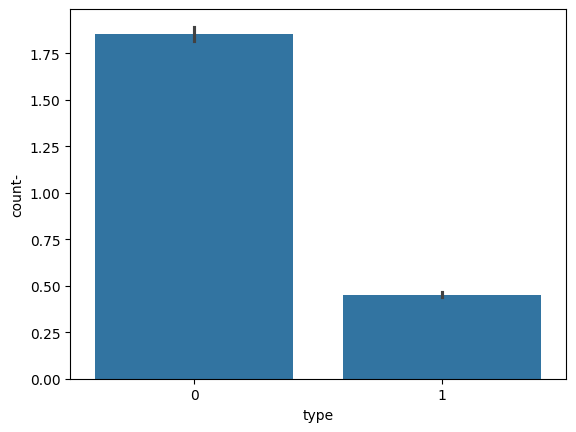

In [79]:
sns.barplot(data=data, x = 'type', y = 'count-')

<Axes: xlabel='type', ylabel='count_'>

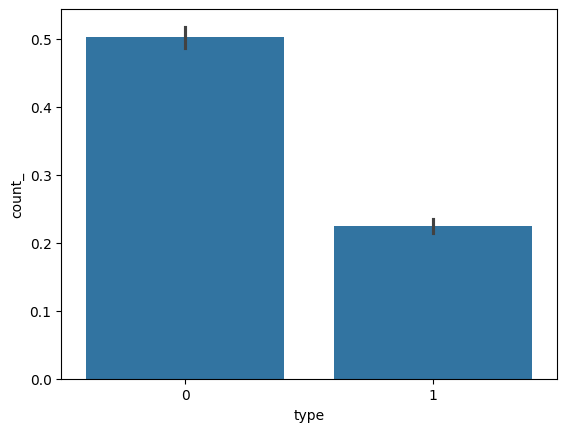

In [80]:
sns.barplot(data=data,x = 'type', y = 'count_')

Correlation of each column

<Axes: >

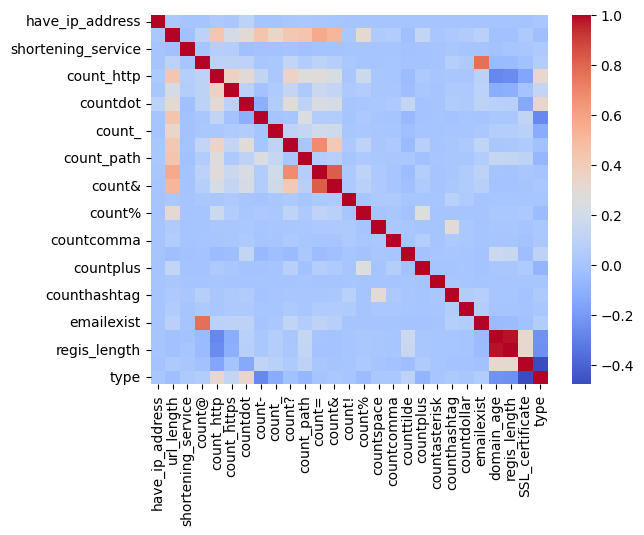

In [81]:
sns.heatmap(data=data.corr(),cmap='coolwarm')

#Preprocessing

##Data Cleaning

Checking missing value

In [82]:
data.isnull().sum()

,0
have_ip_address,0
url_length,0
shortening_service,0
count@,0
count_http,0
count_https,0
countdot,0
count-,0
count_,0
count?,0


Before removing outlier

In [83]:
data.shape

(55730, 27)

Removing Outlier from registration length column

In [84]:
Q1 = data['regis_length'].quantile(0.25)
Q3 = data['regis_length'].quantile(0.75)

IQR = Q3 - Q1
Lower = Q1 - 1.5*IQR
Upper = Q3 + 1.5*IQR

Lower_array = np.where(data['regis_length']<=Lower)[0]
Upper_array = np.where(data['regis_length']>=Upper)[0]

data.drop(index=Lower_array,inplace=True)
data = data.reset_index(drop=True)
data.drop(index=Upper_array,inplace=True)

data = data.reset_index(drop=True)

After removing outlier

In [85]:
data.shape

(55724, 27)

## Feature Selection

Here is the list of features

In [86]:
copydf = data.copy()
copydf.drop(columns=['type'],inplace=True)
features = list(copydf.columns)
features

['have_ip_address',
 'url_length',
 'shortening_service',
 'count@',
 'count_http',
 'count_https',
 'countdot',
 'count-',
 'count_',
 'count?',
 'count_path',
 'count=',
 'count&',
 'count!',
 'count%',
 'countspace',
 'countcomma',
 'counttilde',
 'countplus',
 'countasterisk',
 'counthashtag',
 'countdollar',
 'emailexist',
 'domain_age',
 'regis_length',
 'SSL_certificate']

Selected features using pearson correlation

In [87]:
Pearson_feature = []

for feature in features:
  correlation_coefficient,p_value = pearsonr(copydf[feature],data['type'])
  if abs(correlation_coefficient)>0.1 and p_value <0.05:
    print(f'{feature} :{correlation_coefficient}')
    Pearson_feature.append(feature)

count_http :0.32100791187458777
count_https :0.1310263357033035
countdot :0.3296993979703099
count- :-0.2696988695694754
count_ :-0.11990573641394871
counttilde :0.10286000969916126
domain_age :-0.228017746506855
regis_length :-0.23760975867220246
SSL_certificate :-0.4776256442209508


In [88]:
Pearson_feature.append('type')
data = data[Pearson_feature]

Dataset with selected feature

In [89]:
data.head()

,count_http,count_https,countdot,count-,count_,counttilde,domain_age,regis_length,SSL_certificate,type
0,0,0,2,2,0,0,10650.0,10950.0,1,0
1,0,0,3,0,0,0,10740.0,10950.0,1,0
2,1,0,1,10,0,0,7140.0,7290.0,1,0
3,1,0,1,8,0,0,11130.0,13500.0,1,0
4,0,0,2,5,0,0,10650.0,10950.0,1,0


In [90]:
data.to_csv('sample_data.csv',index=False)

##Standardization

In [91]:
copydf = data.copy()
Scaler = StandardScaler()
copydf = Scaler.fit_transform(copydf)
copydf = pd.DataFrame(copydf,columns=[Pearson_feature])

In [92]:
data['domain_age'] = copydf['domain_age']
data['regis_length'] = copydf['regis_length']

Dataset after standardization

In [93]:
data.head()

,count_http,count_https,countdot,count-,count_,counttilde,domain_age,regis_length,SSL_certificate,type
0,0,0,2,2,0,0,0.985906,0.852273,1,0
1,0,0,3,0,0,0,1.013718,0.852273,1,0
2,1,0,1,10,0,0,-0.098762,-0.213113,1,0
3,1,0,1,8,0,0,1.134237,1.594550,1,0
4,0,0,2,5,0,0,0.985906,0.852273,1,0


##Splitting dataset into train set and test set

In [94]:
x = data.drop(columns=['type'])
y = data['type']
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.3)

#Modeling

##Random Forest Classifier

In [95]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
print(RF.score(x_train,y_train))
RF_pred = RF.predict(x_test)

0.9536225196123673


In [96]:
print(classification_report(y_test,RF_pred,target_names=['benign','phishing']))

              precision    recall  f1-score   support

      benign       0.89      0.90      0.90      8359
    phishing       0.90      0.89      0.90      8359

    accuracy                           0.90     16718
   macro avg       0.90      0.90      0.90     16718
weighted avg       0.90      0.90      0.90     16718



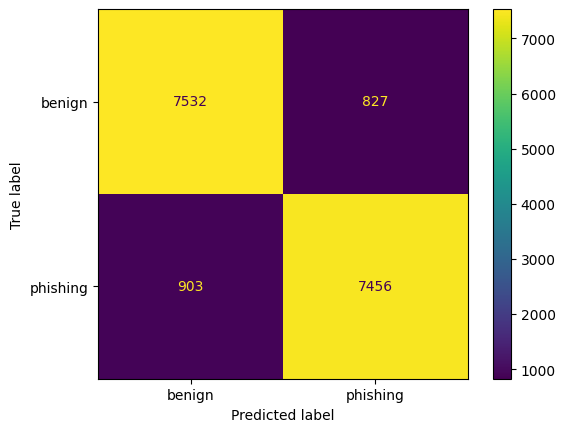

In [97]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,RF_pred),display_labels=['benign','phishing'])
Display.plot()

##XGBoost

In [98]:
import xgboost as xgb

XGB = xgb.XGBClassifier(objective='binary:logistic',seed=42,eval_metric='aucpr',early_stopping_rounds=10)
XGB.fit(x_train,y_train,verbose=True,eval_set=[(x_test,y_test)])

[0]	validation_0-aucpr:0.92902
[1]	validation_0-aucpr:0.93395
[2]	validation_0-aucpr:0.94030
[3]	validation_0-aucpr:0.94276
[4]	validation_0-aucpr:0.94454
[5]	validation_0-aucpr:0.94621
[6]	validation_0-aucpr:0.94801
[7]	validation_0-aucpr:0.95025
[8]	validation_0-aucpr:0.95142
[9]	validation_0-aucpr:0.95299
[10]	validation_0-aucpr:0.95357
[11]	validation_0-aucpr:0.95560
[12]	validation_0-aucpr:0.95605
[13]	validation_0-aucpr:0.95652
[14]	validation_0-aucpr:0.95700
[15]	validation_0-aucpr:0.95747
[16]	validation_0-aucpr:0.95793
[17]	validation_0-aucpr:0.95865
[18]	validation_0-aucpr:0.95906
[19]	validation_0-aucpr:0.95940
[20]	validation_0-aucpr:0.95951
[21]	validation_0-aucpr:0.96060
[22]	validation_0-aucpr:0.96068
[23]	validation_0-aucpr:0.96088
[24]	validation_0-aucpr:0.96174
[25]	validation_0-aucpr:0.96211
[26]	validation_0-aucpr:0.96219
[27]	validation_0-aucpr:0.96253
[28]	validation_0-aucpr:0.96291
[29]	validation_0-aucpr:0.96334
[30]	validation_0-aucpr:0.96345
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [99]:
print(XGB.score(x_train,y_train))

0.9126801004973594


In [100]:
XGB_pred = XGB.predict(x_test)

In [101]:
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      8359
           1       0.91      0.88      0.89      8359

    accuracy                           0.90     16718
   macro avg       0.90      0.90      0.90     16718
weighted avg       0.90      0.90      0.90     16718



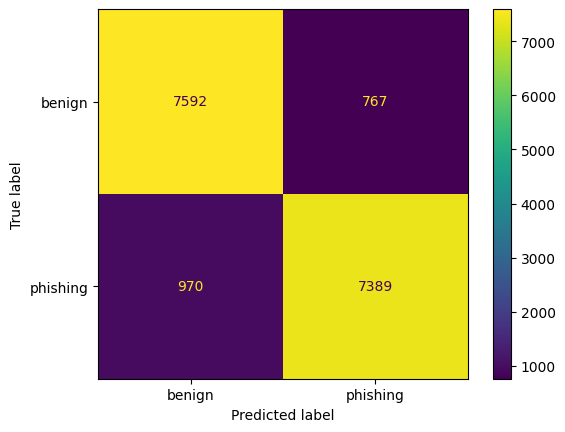

In [102]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,XGB_pred),display_labels=['benign','phishing'])
Display.plot()

##LightGBM

In [103]:
import lightgbm as lgbm

LGBM = lgbm.LGBMClassifier()
LGBM.fit(x_train,y_train,eval_set=[(x_test,y_test)])

[LightGBM] [Info] Number of positive: 19500, number of negative: 19506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 542
[LightGBM] [Info] Number of data points in the train set: 39006, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499923 -> initscore=-0.000308
[LightGBM] [Info] Start training from score -0.000308


LGBMClassifier()

In [104]:
LGBM.score(x_train,y_train)

0.9013997846485157

In [105]:
LGBM_pred = LGBM.predict(x_test)

In [106]:
print(classification_report(y_test,LGBM_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      8359
           1       0.90      0.88      0.89      8359

    accuracy                           0.89     16718
   macro avg       0.89      0.89      0.89     16718
weighted avg       0.89      0.89      0.89     16718



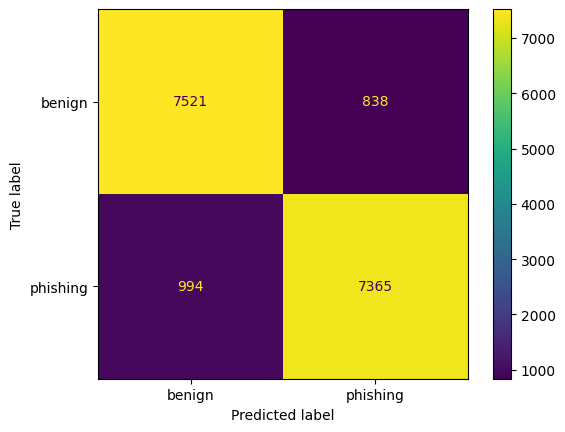

In [107]:
Display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,LGBM_pred),display_labels=['benign','phishing'])
Display.plot()

##Model Comparison

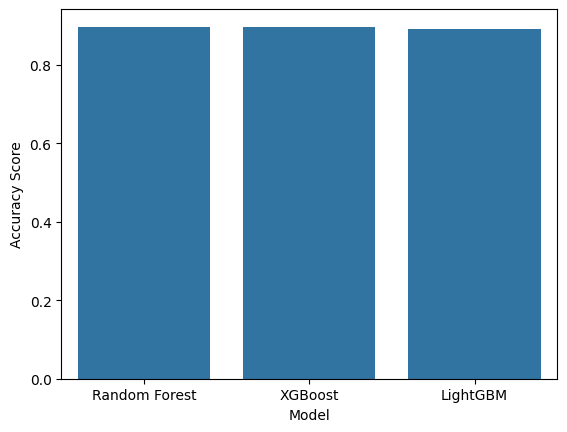

In [108]:
RF_acc = accuracy_score(y_test,RF_pred)
XGB_acc = accuracy_score(y_test,XGB_pred)
LGBM_acc = accuracy_score(y_test,LGBM_pred)

all_acc= np.array([[RF_acc,XGB_acc,LGBM_acc]])
df = pd.DataFrame(all_acc, columns=['Random Forest','XGBoost', 'LightGBM'])
df_melted = df.melt(var_name ='Model',value_name='Accuracy Score')
sns.barplot(data=df_melted, x='Model', y='Accuracy Score')
plt.show()

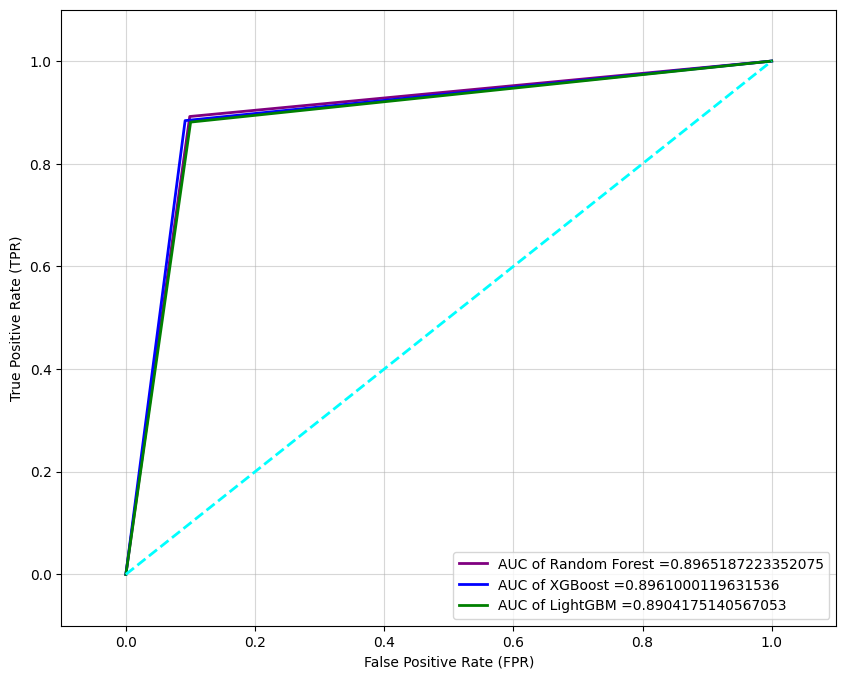

In [109]:
from sklearn.metrics import roc_curve,roc_auc_score

RF_fpr,RF_tpr,_ = roc_curve(y_test,RF_pred)
RF_auc = roc_auc_score(y_test,RF_pred)

XGB_fpr,XGB_tpr,_ = roc_curve(y_test,XGB_pred)
XGB_auc = roc_auc_score(y_test,XGB_pred)

LGBM_fpr,LGBM_tpr,_ = roc_curve(y_test,LGBM_pred)
LGBM_auc = roc_auc_score(y_test,LGBM_pred)

plt.figure(figsize=(10,8))
plt.plot(RF_fpr,RF_tpr,color='purple',lw=2,label='AUC of Random Forest ='+str(RF_auc))
plt.plot(XGB_fpr,XGB_tpr,color='blue',lw=2,label='AUC of XGBoost ='+str(XGB_auc))
plt.plot(LGBM_fpr,LGBM_tpr,color='green',lw=2,label='AUC of LightGBM ='+str(LGBM_auc))
plt.plot([0, 1], [0, 1], color='cyan', lw=2, linestyle='--')
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.legend(loc=4)
plt.show()

#Predict URL

##Helper function used for predicting URL

In [ ]:
def url_length(url):
  return len(str(url))

def count_question_url(url):
  return url.count('?')

def count_equal_url(url):
  return url.count('=')

def count_http_url(url):
  result = urlparse(url)
  if result.scheme == 'http':
    return 1
  else:
    return 0

def count_https_url(url):
  result = urlparse(url)
  if result.scheme == 'https':
    return 1
  else:
    return 0
def count_tilde(url):
  return url.count('~')
def count_dot_url(url):
  return url.count('.')

def count_hyphen_url(url):
  return url.count('-')

def count_underline_url(url):
  return url.count('_')

def count_question_url(url):
  return url.count('?')

def count_slash_url(url):
  path = str(urlparse(url).path)
  return path.count('/')

@lru_cache(maxsize=None)

def get_domain_info(url):
    return whois.whois(url)

def age_of_domain(url):
    try:
        res = get_domain_info(url)
        current_date = datetime.combine(date.today(), datetime.min.time())
        creation_date = res.creation_date[0] if isinstance(res.creation_date, list) else res.creation_date
        # Calculate the domain age correctly
        domain_age = (current_date - creation_date).days
        return int(domain_age)
    except:
        return 0

def registration_length(url):
    try:
        res = get_domain_info(url)
        creation_date = res.creation_date[0] if isinstance(res.creation_date, list) else res.creation_date
        expiration_date = res.expiration_date[0] if isinstance(res.expiration_date, list) else res.expiration_date
        registration_length = (expiration_date - creation_date).days
        return int(registration_length)
    except:
        return 0

def verify_ssl_certificate(url, timeout=5):
    hostname = urlparse(url).netloc
    context = ssl.create_default_context()
    try:
        # Resolve the hostname first
        address_info = socket.getaddrinfo(hostname, 443, proto=socket.IPPROTO_TCP)
        address = address_info[0][4]  # Extract the address tuple

        # Create a socket connection with a timeout
        with socket.create_connection(address, timeout=timeout) as sock:
            with context.wrap_socket(sock, server_hostname=hostname) as ssock:
                ssock.do_handshake()
                cert = ssock.getpeercert()
                return 1
    except Exception as e:
        return 0

##Function for classifying url

In [ ]:
def predict_new_url(mode,url):
    url_data = {
        'count_http': count_http_url(url),
        'count_https': count_https_url(url),
        'countdot':count_dot_url(url),
        'count-': count_hyphen_url(url),
        'count_': count_underline_url(url),
        'counttilde': count_tilde(url),
        'domain_age': age_of_domain(url),
        'regis_length': registration_length(url),
        'SSL_certificate': verify_ssl_certificate(url)
    }

    url_df = pd.DataFrame(url_data, index=[0])

    copydf = data.copy()
    mean_dict = {}
    for i, mean_value in enumerate(Scaler.mean_):
       feature_name = copydf.columns[i]
       mean_dict[feature_name] = mean_value

    std_dict = {}
    for i, std_value in enumerate(Scaler.scale_):
        feature_name = copydf.columns[i]
        std_dict[feature_name] = std_value

    url_df['domain_age'] = (url_df['domain_age'] - mean_dict[('domain_age')]) / std_dict[('domain_age')]
    url_df['regis_length'] = (url_df['regis_length'] - mean_dict[('regis_length')]) / std_dict[('regis_length')]

    RF_pred = RF.predict(url_df)
    XGB_pred = XGB.predict(url_df)
    LGBM_pred = LGBM.predict(url_df)
    if (mode=='All'):
      return RF_pred[0],XGB_pred[0],LGBM_pred[0]
    elif (mode=='RF'):
      return RF_pred[0]
    elif (mode=='XGB'):
      return XGB_pred[0]
    elif (mode=='LGBM'):
      return LGBM_pred[0]
    #if (rf_pred==1):
      #return 'Phishing'
    #else:
     # return 'Benign'

In [ ]:
print(Scaler.mean_)

[2.44813725e-01 7.49407796e-02 2.11269830e+00 1.15338095e+00
 3.63631469e-01 2.51597157e-02 7.45959604e+03 8.02212350e+03
 8.14281100e-01 4.99946163e-01]


In [ ]:
print(Scaler.scale_)

[4.91589065e-01 2.70423971e-01 1.21611531e+00 2.60275875e+00
 1.15822358e+00 1.58092662e-01 3.23601098e+03 3.43537556e+03
 3.88879661e-01 4.99999997e-01]


##Benign

In [ ]:
predict_new_url('All','https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html')

(0, 0, 0)

##Phishing

In [ ]:
predict_new_url('All','signin.eby.de.zukruygxctzmmqi.civpro.co.za')

(1, 1, 1)

# Save Model

In [111]:
import pickle

with open('RF.pickle', 'wb') as file:
    pickle.dump(RF, file)

with open('XGB.pickle', 'wb') as file:
    pickle.dump(XGB, file)

with open('LGBM.pickle', 'wb') as file:
    pickle.dump(LGBM, file)